In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

In [4]:
from keras.datasets import cifar10

In [5]:
def load_dataset():
	# load dataset
	(X_train,y_train), (X_test,y_test) = cifar10.load_data()
	return X_train, y_train, X_test, y_test

In [6]:
def gray(input_data):
  gray = []
  for p in input_data:
    R, G, B, = p[:, :, 0], p[:, :, 1], p[:, :, 2]
    gray_image = 0.2989 * R + 0.5870 * G + 0.1140 * B
    gray.append(gray_image)
  return np.array(gray)

In [7]:
X_train, y_train, X_test, y_test = load_dataset()


170508288/170498071 [==============================] - 11s 0us/step


In [8]:
X_train.shape
num_classes=10

In [9]:
Y_train = to_categorical(y_train, num_classes)
Y_test = to_categorical(y_test, num_classes)

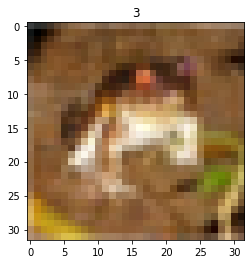

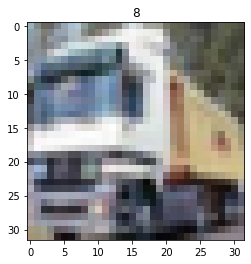

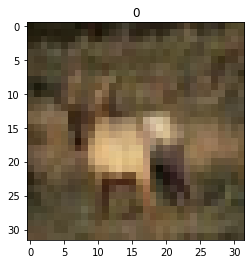

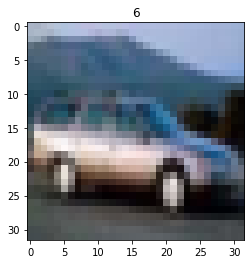

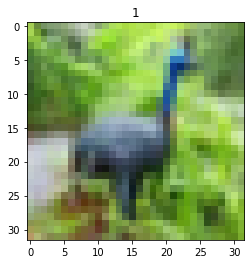

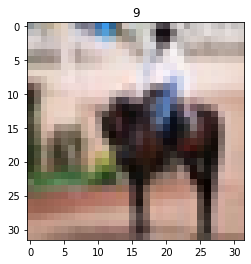

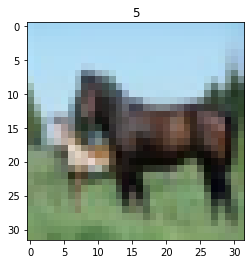

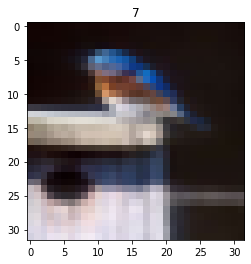

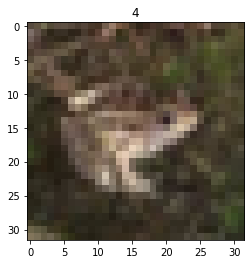

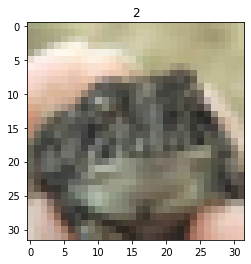

In [10]:
kinds = []
indexes = []
i = 0
while  len(kinds) < 10:
    current_cat = np.where(Y_test[i] == 1)[0][0]
    if kinds.count(current_cat) == 0:
        kinds.append(current_cat)
        indexes.append(i)
    i = i+1

for i in range(len(indexes)):
    plt.imshow(X_train[indexes[i]])
    plt.title(kinds[i])
    plt.show()

In [11]:
# Convert target classes to categorical ones
X_train=gray(X_train)
X_test=gray(X_test)


In [12]:
X_train.shape
X_test.shape

(10000, 32, 32)

In [13]:
feature_vector_length=32*32

X_train = X_train.reshape(X_train.shape[0], feature_vector_length)
X_test = X_test.reshape(X_test.shape[0], feature_vector_length)

# Convert into greyscale
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')


Feature shape: (1024,)


In [14]:
train_dataX = X_train[0 : round(X_train.shape[0]  * 0.8)] 
train_dataY = Y_train[0 : round(X_train.shape[0]  * 0.8)]
eval_dataX = X_train[round(X_train.shape[0] * 0.8):-1]
eval_dataY = Y_train[round(X_train.shape[0] * 0.8):-1]

Epoch 1/20
1250/1250 [==============================] - 9s 5ms/step - loss: 1.9963 - accuracy: 0.2791 - val_loss: 1.9094 - val_accuracy: 0.3009
Epoch 2/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.8381 - accuracy: 0.3437 - val_loss: 1.8470 - val_accuracy: 0.3389
Epoch 3/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.7612 - accuracy: 0.3737 - val_loss: 1.7399 - val_accuracy: 0.3825
Epoch 4/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7016 - accuracy: 0.3950 - val_loss: 1.6961 - val_accuracy: 0.3933
Epoch 5/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.6509 - accuracy: 0.4131 - val_loss: 1.6713 - val_accuracy: 0.4070
Epoch 6/20
1250/1250 [==============================] - 6s 5ms/step - loss: 1.6084 - accuracy: 0.4291 - val_loss: 1.6868 - val_accuracy: 0.4008
Epoch 7/20
1250/1250 [==============================] - 7s 5ms/step - loss: 1.5639 - accuracy: 0.4463 - val_loss: 1.6519 - val_accuracy:

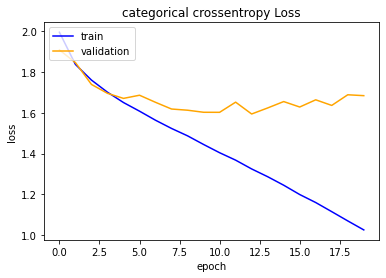

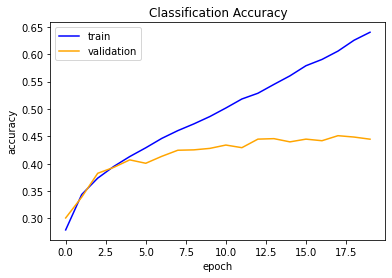

In [15]:
def define_model_baseline1():
	model = Sequential()
	model.add(Dense(512, activation='relu', kernel_initializer='he_uniform',input_shape=input_shape ))
	model.add(Dense(1024, activation='relu' ))
	model.add(Dense(1024, activation='relu' ))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline2():
	model = Sequential()
	model.add(Dense(512, activation='relu', kernel_initializer='he_uniform',input_shape=input_shape ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline3():
	model = Sequential()
	model.add(Dense(512, activation='relu', kernel_initializer='he_uniform',input_shape=input_shape ))
	model.add(Dense(512, activation='sigmoid' ))
	model.add(Dense(512, activation='sigmoid' ))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline4():
	model = Sequential()
	model.add(Dense(512, activation='relu', kernel_initializer='he_uniform',input_shape=input_shape ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(learning_rate=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='MAE', metrics=['accuracy'])
	return model

def define_model_baseline5():
	model = Sequential()
	model.add(Dense(512, activation='relu', kernel_initializer='he_uniform',input_shape=input_shape ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(10, activation='softmax'))
	# compile model

	model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline6():
	model = Sequential()
	model.add(Dense(512, activation='relu', kernel_initializer='he_uniform',input_shape=input_shape ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(10, activation='softmax'))
	# compile model

	model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

def define_model_baseline7():
	model = Sequential()
	model.add(Dense(512, activation='relu', kernel_initializer='he_uniform',input_shape=input_shape ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(512, activation='relu' ))
	model.add(Dense(10, activation='softmax'))
	# compile model

	model.compile(optimizer='Adamax', loss='categorical_crossentropy', metrics=['accuracy'])
	return model


def summarize_diagnostics(history):
	# plot loss
	plt.title('categorical crossentropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	plt.ylabel('loss')
	plt.xlabel('epoch')
	plt.legend(['train', 'validation'], loc='upper left')
	plt.show()
	# plot accuracy
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.title('Classification Accuracy')
	plt.ylabel('accuracy')
	plt.xlabel('epoch')
	plt.legend(['train', 'validation'], loc='upper left')
	plt.show()
   


def run_test_harness(train_dataX,train_dataY,eval_dataX,eval_dataY,X_test,Y_test):
	
	# define model
	
	model = define_model_baseline7()

 	# fit model
	start = time.time()
	history = model.fit(train_dataX, train_dataY, epochs=20, batch_size=32, validation_data=(eval_dataX, eval_dataY), verbose=1)
	stop = time.time()
 
	
 
	# evaluate model
	test_loss,test_acc = model.evaluate(X_test,Y_test, verbose=1)
	predicted = model.predict(X_test)
	predicted=np.argmax(predicted, axis=1)
	Y_test=np.argmax(Y_test, axis=1)
	
	matrix = confusion_matrix(Y_test, predicted)
	f1=f1_score(Y_test, predicted,average='weighted')
	recall=recall_score(Y_test, predicted,average='weighted')
	precision=precision_score(Y_test, predicted,average='weighted')

	
	print("\n\n")
	print(f"Training time: {stop - start}s")
	print("test loss: ", test_loss)
	print("test acc: ", test_acc*100)
	print("f1 score:  ",f1)
	print("recall score: ",recall)
	print("precision score: ",precision)
	print("confusion matrix:\n\n",matrix)
	print("\n")
	
	


	# learning curves
	summarize_diagnostics(history)
	
		 
run_test_harness(train_dataX,train_dataY,eval_dataX,eval_dataY,X_test,Y_test)
